<a href="https://colab.research.google.com/github/jeremiasAmorim/Repository_01/blob/main/Projeto_Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *New York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos apartir do site [Insid Airbnb]( http://insideairbnb.com/get-the-data.html). 

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

*`listings.csv` - Summary information and metrics for listings in New York (good for visualisations).* 

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv) exato ultizado nesse notebook não esteja mais disponível, o que quebraria nosso código.


Pensando nisso, disponibilizamos [aqui](http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv) o conjunto que utilizamos, para que você
sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# instalar o pywaffle
!pip install pywaffle -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 36.1 MB/s eta 0:00:00


In [3]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do próprietario (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Nome do Distrito
* `neighbourhood` - nome do bairro
* `latitude` - cordenada da latitude da propriedade
* `longitude` - cordenada da longitude da propridade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para o aluguel do imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do ultimo review
* `reviews_per_month` - quantidade de revies por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que a listagem tem nos últimos 12 meses.
* `lincense` - número de licença/autorização/registo

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:

# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,2022-07-18,0.30,30,217,4,NaN
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,299,30,9,2018-10-19,0.11,9,356,0,NaN
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70309,-73.89963,Entire home/apt,425,30,13,2019-11-12,0.10,6,365,0,NaN
3,45935,Room in Beautiful Townhouse.,204586,L,Bronx,Mott Haven,40.80635,-73.92201,Private room,60,30,0,NaN,NaN,1,83,0,NaN
4,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.80630,-73.95985,Private room,75,31,135,2022-07-11,0.95,1,219,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entrada que nosso conjunto de dados possui e ver o tipo de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página página que baixamos o arquivo `listings.csv`. Há uma versão mais completa.

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Varáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 39881
Varáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada a quantidade de valores ausentes. É importante entender que logo no inicio se esse valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `license`possui quase 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em cerca de 20% das linhas.

* As variáveis `name` e `host_name` possuem menos de 4% de seus valores nulos.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.999875
reviews_per_month                 0.209674
last_review                       0.209674
host_name                         0.001254
name                              0.000326
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar um histograma.

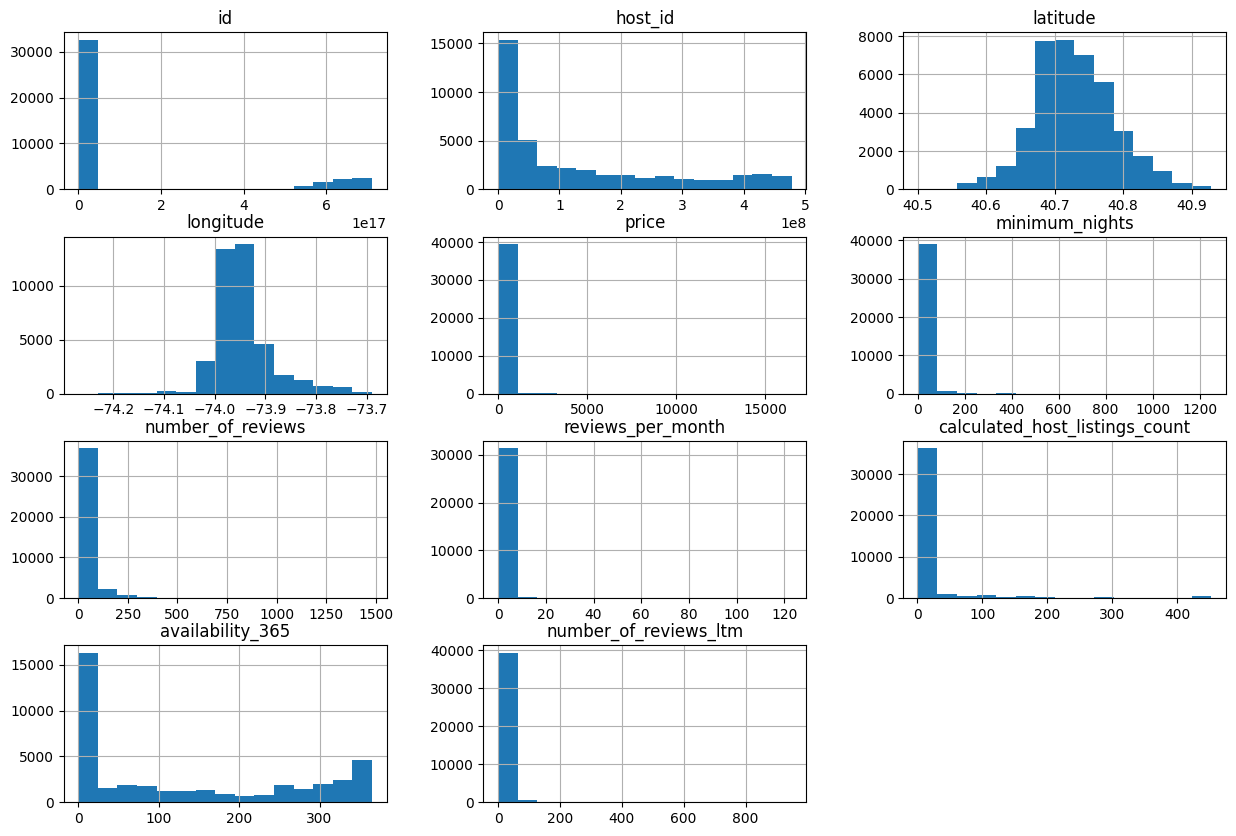

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possivél verificar indicios de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights`e `calculated_host_listings_count`.
Os valores apresentão discrepancia, não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar a Duas maneiras de rápidas que auxiliam a detecção de Outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [ ]:
# Ver o resumo estatístico das variáveis numéricas 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'reviews_per_month', 'calculated_host_listings_count', 
     'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,39881.000000,39881.000000,39881.000000,31519.000000,31519.000000,39881.000000,39881.000000,39881.000000
mean,197.547228,19.131742,26.690855,1.244733,1.244733,16.931396,131.535669,7.754344
std,353.332542,31.432778,56.256044,1.991702,1.991702,59.597136,138.539399,18.784149
min,0.000000,1.000000,0.000000,0.010000,0.010000,1.000000,0.000000,0.000000
25%,80.000000,2.000000,1.000000,0.140000,0.140000,1.000000,0.000000,0.000000
50%,130.000000,14.000000,5.000000,0.560000,0.560000,1.000000,75.000000,1.000000
75%,219.000000,30.000000,25.000000,1.790000,1.790000,4.000000,277.000000,7.000000
max,16500.000000,1250.000000,1480.000000,123.000000,123.000000,453.000000,365.000000,949.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipoteses como:
* A variável `price` possui 75% do valor abaixo de 219, porém seu valor máximo é de 16.500
* A quantidade minima de noites (`minimum_nights`) está acima de 365 dias no ano.
#### Boxplot para minimum_nights

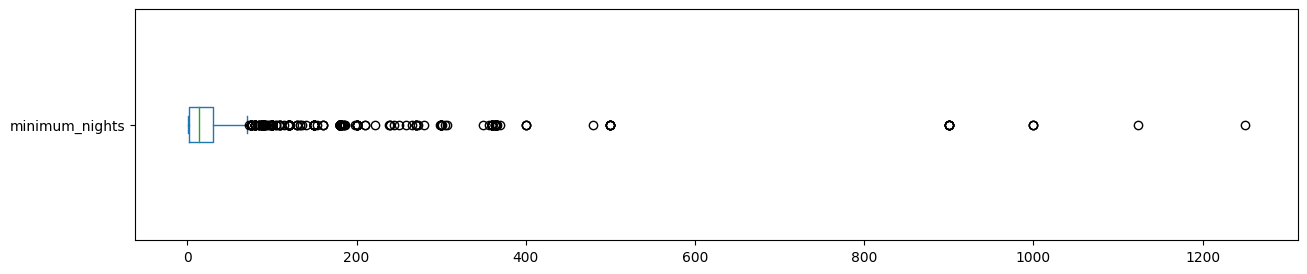

minimum_nights: Valores acima de 30:
1890 entradas
4.7391%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: Valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

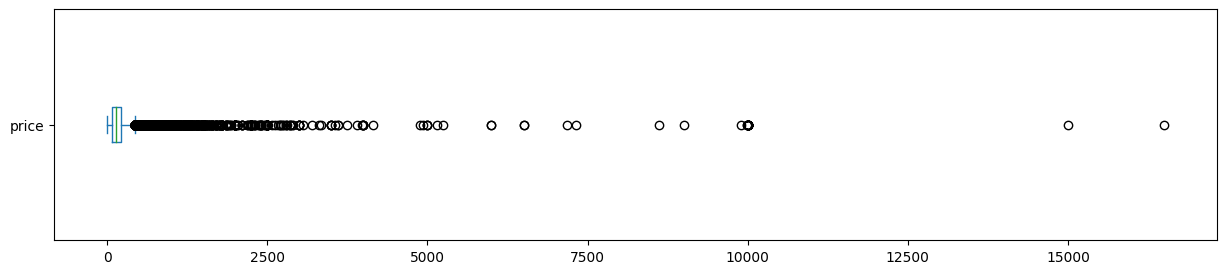


price: valores acima de 1500
232 entradas
0.5817%


In [ ]:
# Price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()
# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))
# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

####Histogramas sem outliers
Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

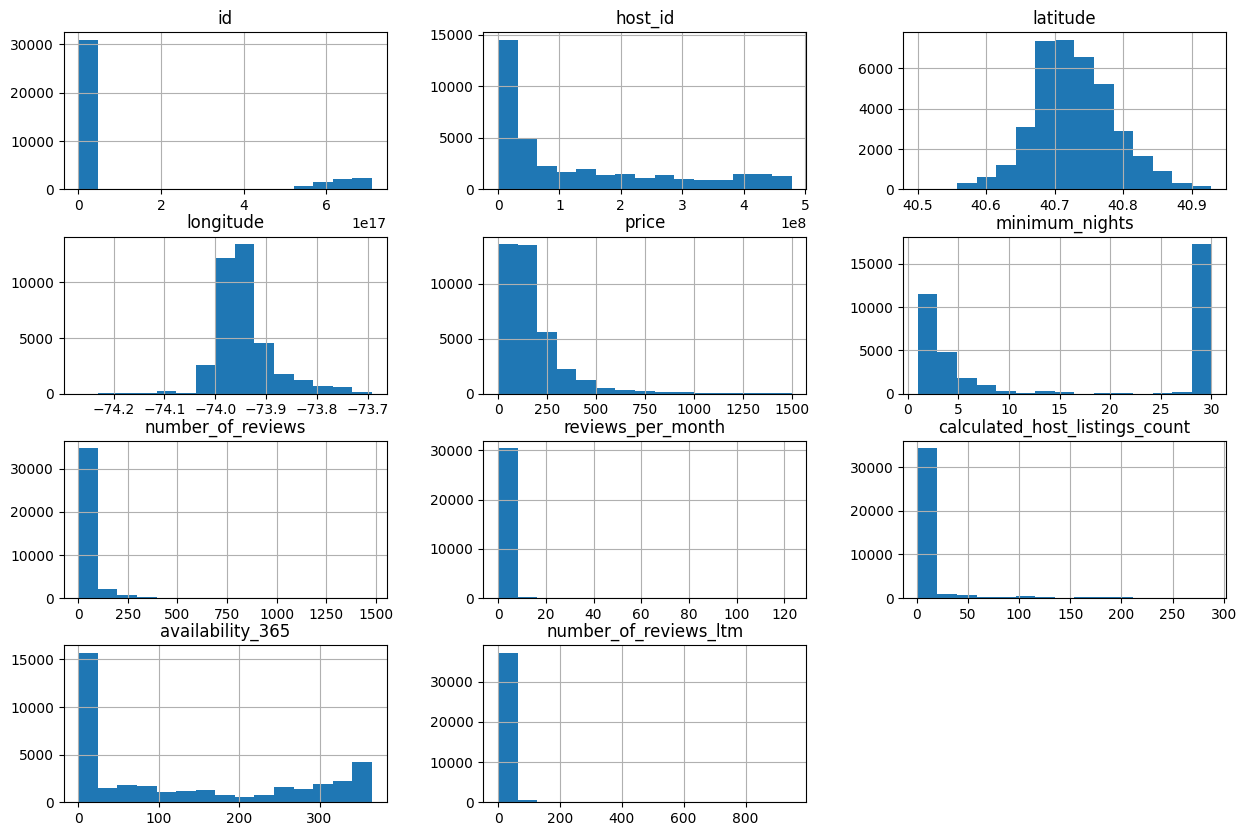

In [ ]:
# Remover os `outliers` em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Feito a limpeza no nosso dataset agora iremos verificar o nosso resumo estátisco novamente.

In [ ]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000
mean,178.315359,15.604855,27.702933,10.207936,128.786981
std,165.553356,13.564298,57.283184,29.877866,137.946104
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,80.000000,2.000000,1.000000,1.000000,0.000000
50%,130.000000,7.000000,6.000000,1.000000,71.000000
75%,210.000000,30.000000,27.000000,3.000000,273.000000
max,1500.000000,30.000000,1480.000000,288.000000,365.000000


### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
df_clean.price.mean()

178.31535895806863

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.152963,-0.027909,0.064415,0.029289,0.157978
minimum_nights,-0.152963,1.000000,-0.244192,-0.418237,0.102292,-0.245380
number_of_reviews,-0.027909,-0.244192,1.000000,0.519285,-0.079129,0.097921
reviews_per_month,0.064415,-0.418237,0.519285,1.000000,-0.014565,0.216602
calculated_host_listings_count,0.029289,0.102292,-0.079129,-0.014565,1.000000,0.095542
availability_365,0.157978,-0.245380,0.097921,0.216602,0.095542,1.000000


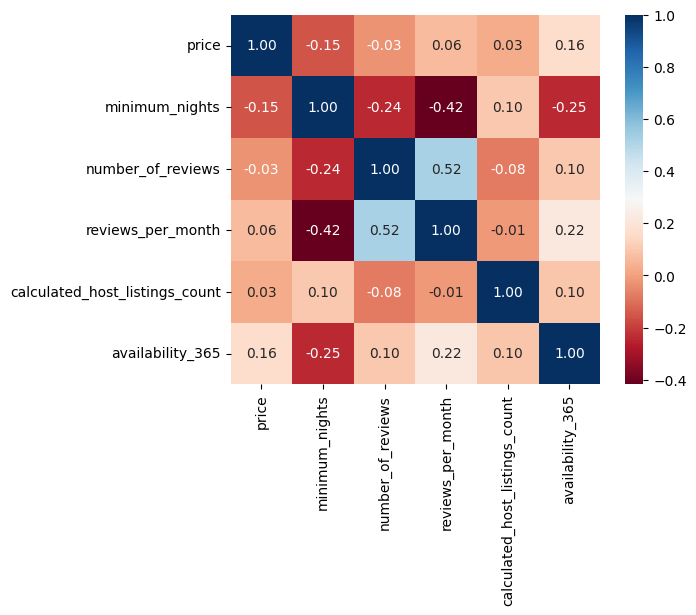

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Aibnb. Se você ja alugou no site, sabe que existem opções de apartamentos/ casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a ocorrêcia de cada tipo de aluguel, usando o método 
`value_counts()`

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    21397
Private room       15661
Shared room          519
Hotel room           199
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.566418
Private room       0.414575
Shared room        0.013739
Hotel room         0.005268
Name: room_type, dtype: float64

Para um melhor visualização, transmitirei esses dados em forma de imagem.


In [39]:
from pywaffle import Waffle

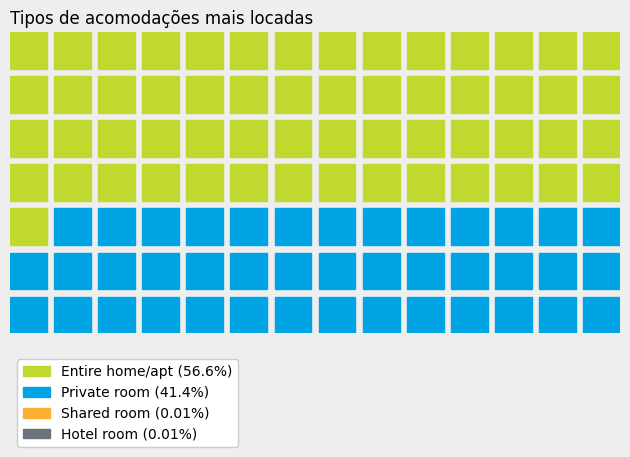

In [41]:
data = {'Entire home/apt': 56.6, 'Private room': 41.4, 'Shared room': 0.01, 'Hotel room': 0.01}
fig = plt.figure(
    FigureClass= Waffle,
    rows=7,
    values=data,
    colors=["#C1D82F", "#00A4E4", "#FBB034", '#6A737B'],
    title={'label':'Tipos de acomodações mais locadas', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 1, 'framealpha': 1},
    starting_location='NW',
    vertical=True,
    block_arranging_style='snake'
)
fig.set_facecolor('#EEEEEE')
plt.show()

### **Q6. Qual a localidade mais cara de New York?**
Uma maneira de se verificar uma variável em função de outra é usando o `groupby()`. No caso, queremos comparar os distritos (neighbourhood_group) e os bairros(neighbourhood) apartir do preço de locação



In [ ]:
#verificando o distrito mais caro de New York
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Manhattan        227.797838
Brooklyn         154.061657
Staten Island    133.976959
Queens           126.321113
Bronx            114.253558
Name: price, dtype: float64

Gráfico de barras para visualizar o Distrito mais caro.

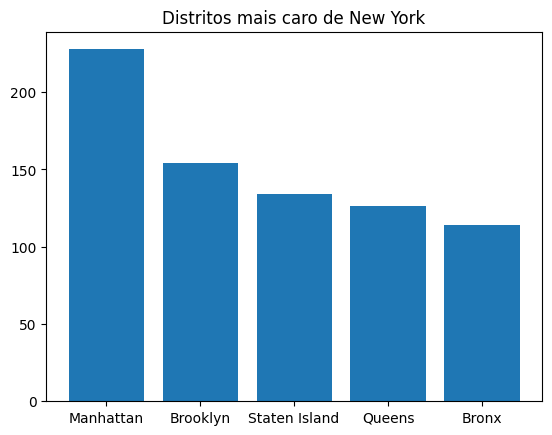

<Figure size 1000x500 with 0 Axes>

In [ ]:
Distritos = ['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx']
Preço = [227.7, 154, 133.9, 126.3, 114.2]
plt.bar(Distritos, Preço)
plt.title('Distritos mais caro de New York')
plt.figure(figsize=(10, 5))

plt.show();

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[0 :10]


neighbourhood
Fort Wadsworth        650.000000
Hollis Hills          497.000000
Tribeca               428.555556
Theater District      421.750000
Navy Yard             359.000000
Belle Harbor          354.857143
Willowbrook           329.000000
Financial District    325.307517
SoHo                  320.867299
Midtown               317.639103
Name: price, dtype: float64

Acima, vemos que bairros como Fort Wadsworth, Hollis Hills, estão com a média de preço superior a de lugares como Times Square, Soho, e Upper West Side.
 Uma pessoa que não conhece New York, poderia facilmente se enganar com esses resultado, e não se questionar.
 Só para dar um único exemplo de como uma amostra pode não ser não-representativa, veja quantas entradas tem para Fort Wadsworth.

In [ ]:
# Ver quantidade de imóveis na Fort Wadsworth 
print(df_clean[df_clean.neighbourhood == "Fort Wadsworth"].shape)

# Ver as entradas de Fort Wadsworth
df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

(1, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
11677,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,650,30,0,NaN,NaN,2,365,0,NaN


Deve-se checar também o número de imóveis disponíveis em cada um destes bairros exibidos como os 10 mais caros antes de tomar quaisquer conclusões, pois não seria nada justo dizer que um bairro com apenas um imóvel no Airbnb é o mais caro de New York City simplesmente porque este imóvel específico possui um aluguel muito caro.

In [ ]:
print('Fort Wadsworth: ', df_clean[df_clean.neighbourhood == 'Fort Wadsworth'].shape)
print('Hollis Hills: ', df_clean[df_clean.neighbourhood == 'Hollis Hills'].shape)
print('Tribeca: ', df_clean[df_clean.neighbourhood == 'Tribeca'].shape)
print('Theater District: ', df_clean[df_clean.neighbourhood == 'Theater District'].shape)
print('Navy Yard: ', df_clean[df_clean.neighbourhood == 'Navy Yard'].shape)
print('Belle Harbor: ', df_clean[df_clean.neighbourhood == 'Belle Harbor'].shape)
print('Willowbrook: ', df_clean[df_clean.neighbourhood == 'Willowbrook'].shape)
print('Financial District: ', df_clean[df_clean.neighbourhood == 'AFinancial District'].shape)
print('SoHo: ', df_clean[df_clean.neighbourhood == 'SoHo'].shape)
print('Midtown: ', df_clean[df_clean.neighbourhood == 'Midtown'].shape)


Fort Wadsworth:  (1, 18)
Hollis Hills:  (1, 18)
Tribeca:  (198, 18)
Theater District:  (268, 18)
Navy Yard:  (7, 18)
Belle Harbor:  (7, 18)
Willowbrook:  (1, 18)
Financial District:  (0, 18)
SoHo:  (211, 18)
Midtown:  (1560, 18)


Apartir dessa ánalise podemos verificar que os bairros Fort Wadsworth, Hollis Hills possuem apenas um único imóvel, então desconsideraremos como bairros mais caros, em uma análise justa e coerente verificamos então que a media de preços mais carasde New York é o bairro de Tribeca. 
Sendo assim plotaremos um gráfico de barras para ilustrar melhor os bairros mais caros, nesse Gráfico serão consierados apenas os Bairros com mais de um imóvel disponível.

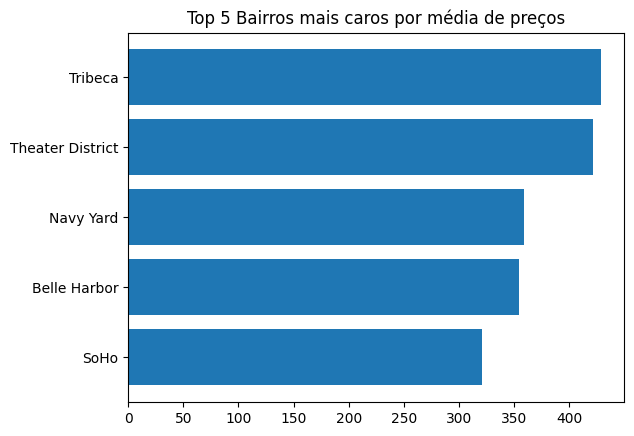

In [6]:
# gráfico de barras para bairros mais caros.
df = pd.DataFrame ({
        'Group':  ['Tribeca', 'Theater District', 'Navy Yard', 'Belle Harbor', 'SoHo'],
        'Value': [428.55, 421.75,359.00,354.85,320.86,]
})

# Sort the table
df = df.sort_values(by=['Value'])

# Create horizontal bars
plt.barh(y=df.Group, width=df.Value);

# Add title
plt.title('Top 5 Bairros mais caros por média de preços');

Como são fornecidas as latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `X-longitude` e `Y-latitude`.

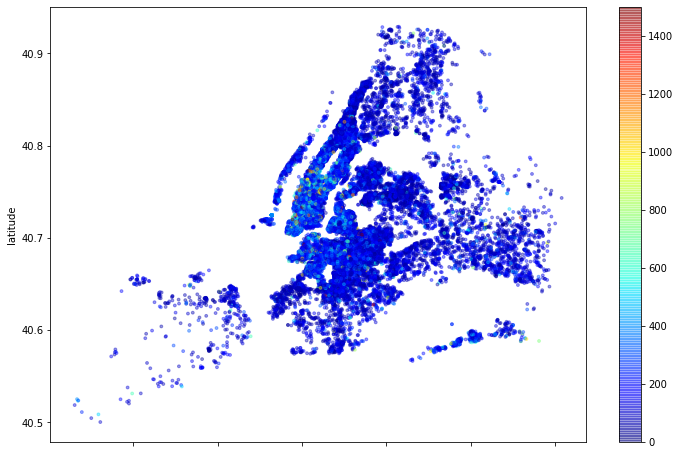

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

15.604854934349852

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém ja se percebeu que existem Outliers em algumas variáveis.
Nota se que tem em algumas localidades há poucos imóveis disponiveis, que acaba distorcedo a informação estatístitca de algums atributos.
É o caso do bairro Fort Wadsworth, que possui apenas um imóvel para aluguel, e  que chega a custar 650$. 
 
A média de preço de Alugueis em New York City custa em torno de 179 dólares por dia.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.


